# Introduction
Marketing is extremely critical and crucial for the growth and sustainability of any business. Marketers attempt to build a company's brand, engage customers, grow revenue and increase sales. This is by done by reaching out to new customers, educate and communicate value proposition, and engage with them to understand their needs.

The main key point for marketers is to know their customers and understand their needs. By understanding their customers, marketers can launch a targeted marketing campaign that is tailored to specific needs. If data about customers is available, data science can be leveraged to apply market segmentation, dividing customers into groups or clusters based on certain common features.

In this case study, a bank has collected extensive data on their customers for the past 6 months. The marketing department wants to launch a targeted ad compaign by dividing their userbase into at least three distinct groups.

The dataset provided has the following columns:

 - CUSTID: Identification of Credit Card holder 
 - BALANCE: Balance amount left in customer's account to make purchases
 - BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
 - PURCHASES: Amount of purchases made from account
 - ONEOFFPURCHASES: Maximum purchase amount done in one-go
 - CASH_ADVANCE: Cash in advance given by the user
 - PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 - ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
 - PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
 - CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
 - CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
 - PURCHASES_TRX: Number of purchase transactions made
 - CREDIT_LIMIT: Limit of Credit Card for user
 - PAYMENTS: Amount of Payment done by user
 - MINIMUM_PAYMENTS: Minimum amount of payments made by user  
 - PRC_FULL_PAYMENT: Percent of full payment paid by user
 - TENURE: Tenure of credit card service for user

### Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Analysis/Modeling


Let's start by reading our data set and explore the overall statistical properties.

In [2]:
df = pd.read_csv('./Dataset/Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

Our dataset has 18 column features and 8950 customers. Let's take a look at some high level statistics for our data.

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The average consumer balance is \\$1564, with the minimum account holding \\$0 and the highest holding \\$19043. Account balances are updated 87% of the time. The average purchases made by clients is around \\$1003, while one off purchases is around \\$592. Average purchase frequency is around 0.5, while one off purchases frequency is on the lower end of 0.2. This is intuitive since one off purchases tend to be quite expensive and are usually considered big purchases.

Purchase installments frequency and cash advance frequency are also low, 0.3 and 0.1 respectively. In the case of cash advance, the interest rates paid on it can be quite high, therefore most people do not use cash advances.

The average credit limit is about $4500. The customer base for the bank is loyal, with an average tenure of 11 years. However, on average, the full balance payment is, on average, only done at a rate of 15%.

Let's take a look at the extreme case where a customer made a \\$49039 one off purchase!

In [5]:
df[df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


This customer makes a lot of purchases, with high installment payments, and low cash advances. Let's take a look at the person who made the maximum cash advance.

In [6]:
df[df['CASH_ADVANCE']==df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


The customer has a cash advance frequency of 1.0, meaning he uses this 100% of the time. He has made a total of 123 cash advance transactions and has never paid his card in full.

Lets explore our dataset further. We will check if there are any missing values and impute as necessary.

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We have 313 missing values in the MINIMUM_PAYMENTS column as well as 1 missing value in CREDIT_LIMIT. It's time to impute. We will use the means of each columns as a fill in for the missing values. 

We will be using a very powerful imputation method called Multiple Imputation by Chained Equations (MICE). This works by selecting one feature with missing values as the target variable and utilises a regression model to impute the missing values based on all the other variables in the dataset. The other features with missing values will be set to a placeholder value such as mean.

It then repeats this process in a round-robin fashion, meaning that each feature with missing values will be regressed against all the other features. When the MICE algorithm has completed all the steps listed above, it will repeat this cycle for 5-10 times. Once we get to the final cycle, we are outputted with an imputed dataset.

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=None)
df = pd.DataFrame(imputer.fit_transform(df.drop('CUST_ID', axis=1)),columns=df.drop('CUST_ID',axis=1).columns)

In [9]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We dropped CUST_ID column as it is not a useful feature. Our MICE algorithm was able to impute the missing values. We have a complete dataset now. Let's take a look at our data distributions by looking at their Kernel Density Estimate.

<Figure size 720x3600 with 0 Axes>

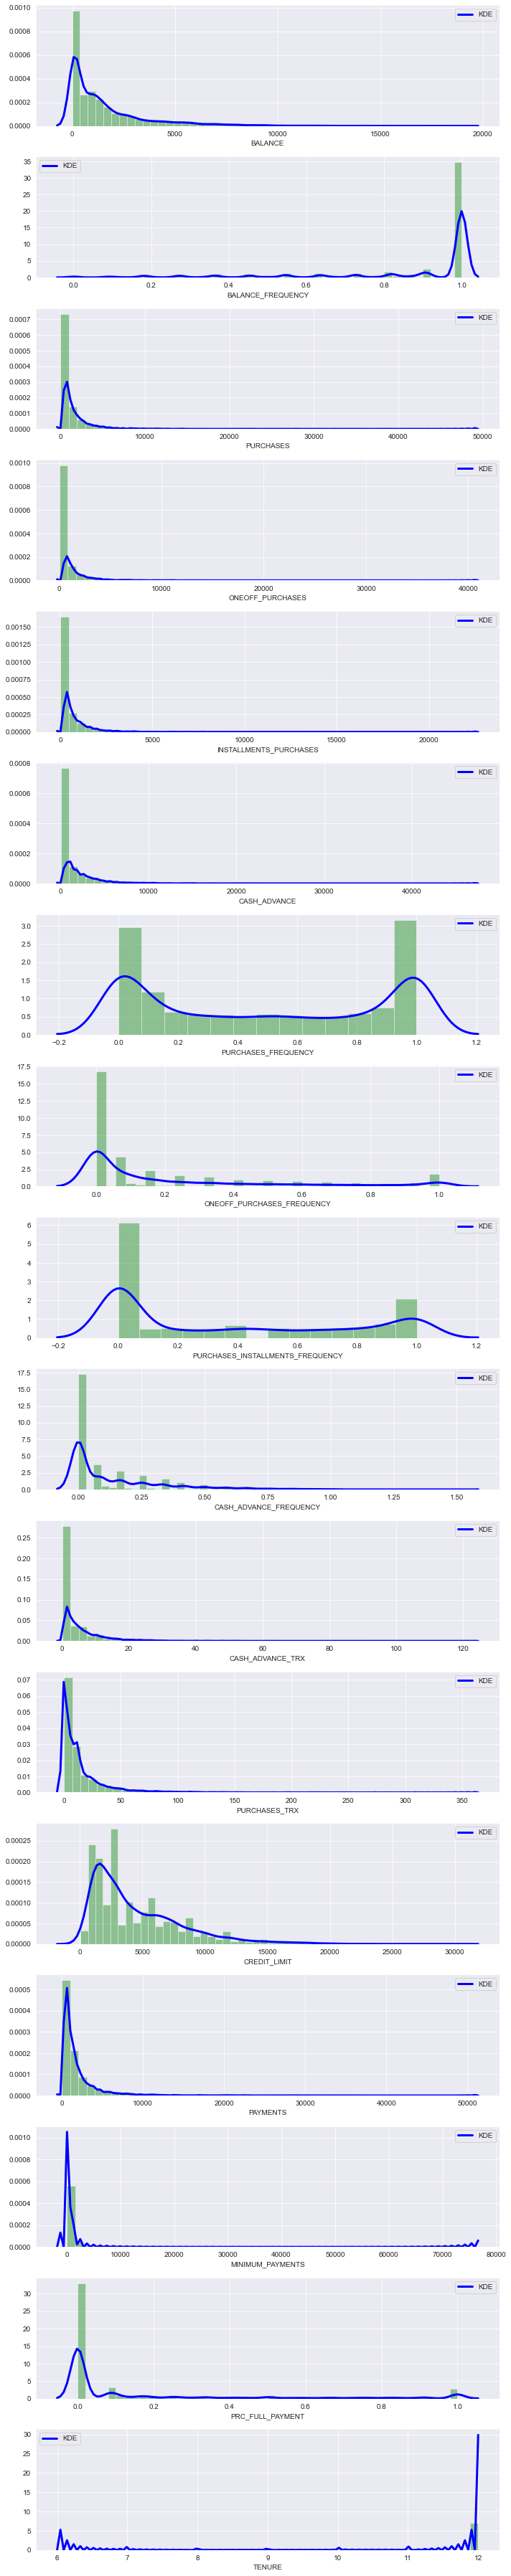

In [10]:
plt.figure(figsize=(10,50))
for ii in range(len(df.columns)):
  plt.subplot(17,1,ii+1)
  sns.distplot(df.iloc[:,ii],kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
plt.tight_layout()

As can be seen from the plots, the majority of the customers have a balance in the 1000's. Majority have around \\$4500 limits and have a tenure of 11-12 years. An overwhelming majority of customers update their balance frequently, meaning they use their credit cards. The majory of customers have about 20 purchase transactions. One off purchases frequency, installement purchases and cash advances are on the low end.

Purchase frequency is divided into two groups, one group uses their credit card for purchases frequently, and another does not. Very small number of customers pay their balance in full.

Let's take a look at any feature correlations!

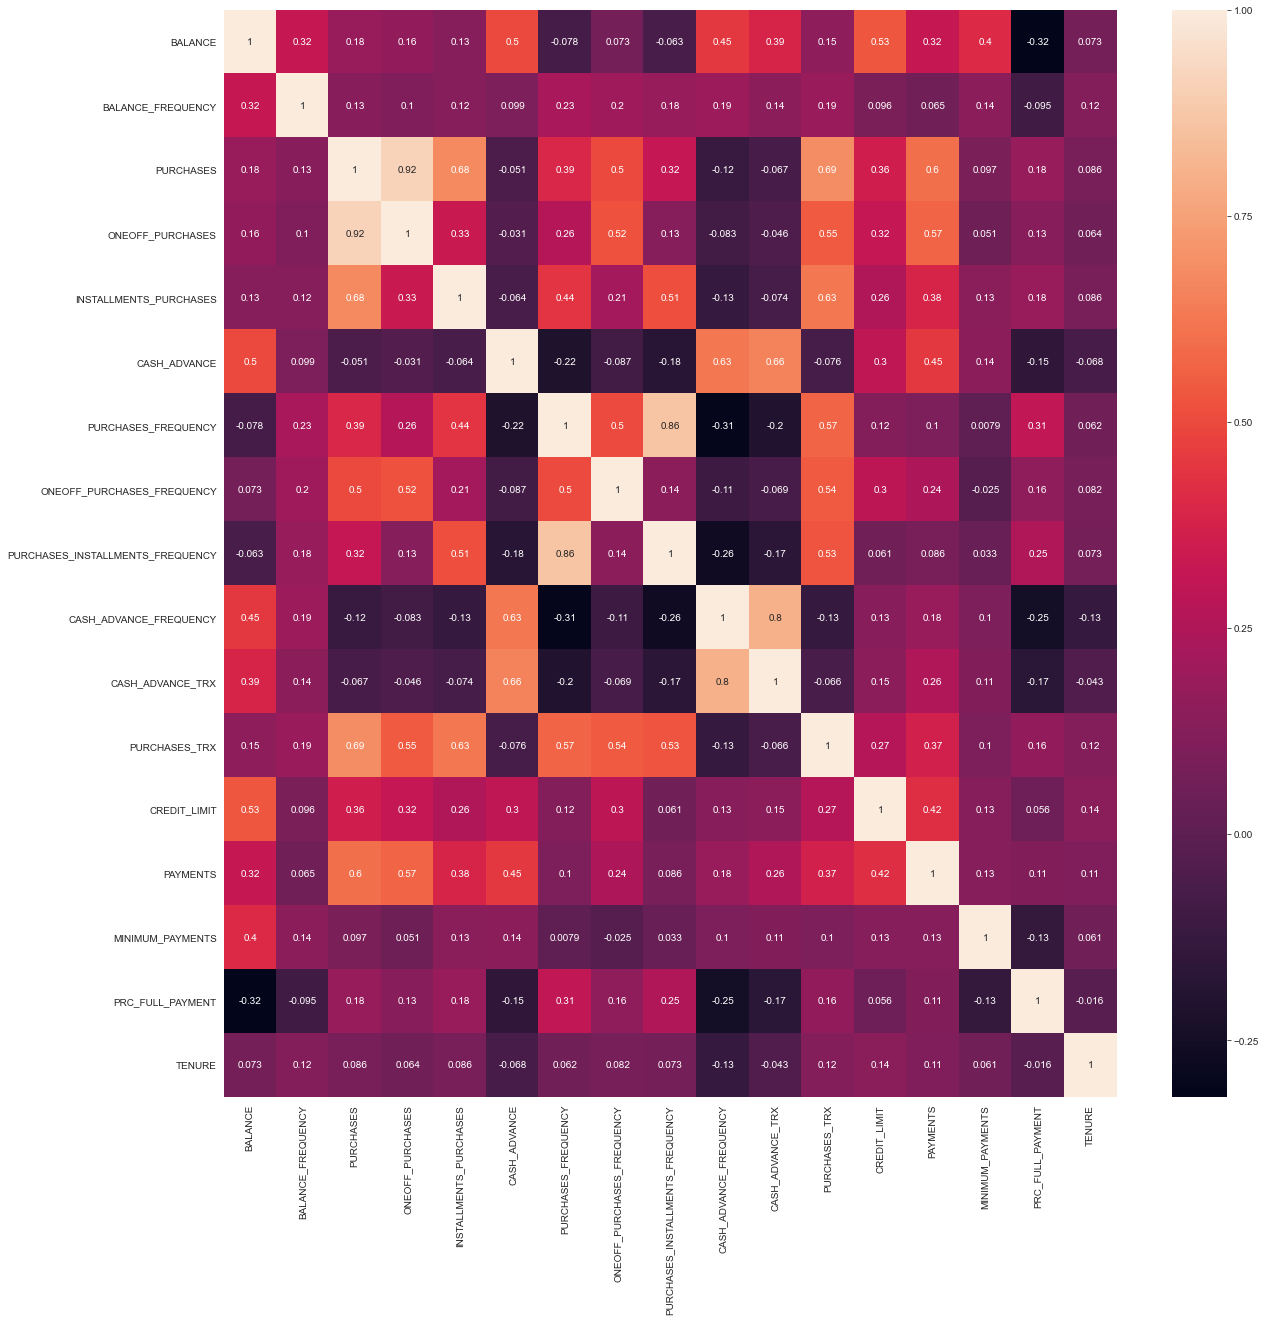

In [11]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

Purchases is highly correlated with one-off purchases, while purchases frequency with purchase installment frequency. Another set of highly correlated features are cash advance frequency and number of cash advance transactions.

We will start our customer segmentation by applying a KMeans clustering algorithm. However, before doing so, we need to find the optimal number of clusters K by applying the elbow method. The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset by minimizing the within cluster sum of squares (WCSS) dependent of different values of K. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

In [12]:
# Let's scale the data first
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Finding the right number of clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'WCSS')

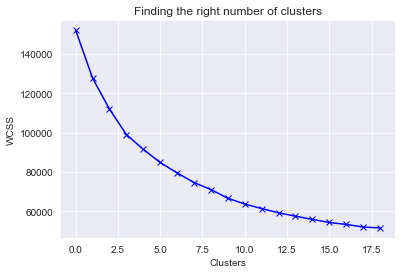

In [22]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_) #Inertia is the WCSS

plt.plot(wcss, 'bx-')
plt.title('Finding the right number of clusters');
plt.xlabel('Clusters')
plt.ylabel('WCSS') 


As can be seen from the above figure, we can see that the values start to become linear at around the 6th clusters. We will choose our K value to be 6. We can now start applying our KMeans algorithm.

In [23]:
kmeans = KMeans(6)
kmeans.fit(df_scaled)
labels = kmeans.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.cluster_centers_.shape

(6, 17)

We have 6 clusters with 17 features. Makes sense! Lets take a look at the clusters.

In [25]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df.columns)
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.015541,0.371758,-0.344723,-0.223219,-0.404900,-0.085157,-0.824436,-0.334312,-0.769399,0.129116,-0.029950,-0.469990,-0.336245,-0.262327,-0.024033,-0.450938,-0.008268
1,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198396,4.783704,1.087028,0.824001,0.334613
2,0.136142,0.426932,0.921291,0.872394,0.575603,-0.310516,1.087304,1.839538,0.540659,-0.407379,-0.320424,1.179480,0.687040,0.372862,-0.016705,0.434264,0.271169
3,-0.397304,0.308041,-0.067147,-0.245198,0.291669,-0.365611,0.966228,-0.377045,1.141244,-0.462405,-0.357552,0.122978,-0.329020,-0.250959,-0.048361,0.342370,-0.025686
4,1.593368,0.377394,-0.209532,-0.151527,-0.217143,1.941607,-0.457006,-0.189573,-0.412648,1.889707,1.839167,-0.251677,0.962919,0.765832,0.523779,-0.392110,-0.090441
5,-0.697814,-2.122602,-0.312952,-0.230962,-0.315553,-0.306789,-0.559723,-0.418763,-0.464719,-0.484257,-0.357722,-0.425650,-0.208983,-0.220768,-0.303995,0.262172,-0.165241


The data above does not make sense because the data has been normalized before applying Kmeans clustering. We will perform the inverse transformation to output original values.

In [26]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1532.126777,0.965337,266.698265,221.939700,44.921461,800.292821,0.159465,0.102726,0.058659,0.160982,3.044437,3.027650,3270.825104,973.732090,787.582265,0.021823,11.506254
1,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
2,1847.841923,0.978407,2971.556861,2040.433518,931.578234,327.704395,0.926738,0.751228,0.579309,0.053624,1.062168,44.027293,6994.008546,2812.541757,804.702206,0.280730,11.880212
3,737.519952,0.950243,859.743891,185.459592,674.819883,212.168596,0.878145,0.089978,0.817997,0.042612,0.808797,17.766607,3297.114094,1006.640787,730.746448,0.253852,11.482944
4,4880.936669,0.966672,555.537059,340.933829,214.708153,5050.512423,0.306932,0.145904,0.200441,0.513294,15.799794,8.454076,7997.785909,3950.153783,2067.410231,0.039029,11.396285
5,112.032903,0.374446,334.577748,209.087489,125.716824,335.519237,0.265707,0.077533,0.179746,0.038239,0.807634,4.129771,3733.864739,1094.040758,133.520159,0.230395,11.296183


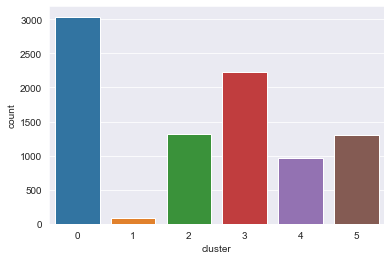

In [27]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
sns.countplot(x='cluster',data=df_cluster)

The clusters are defined as such:

- Big Spenders with large Payments - they make expensive purchases and have a credit limit that is high. This is only a small group of customers.

- Cash Advances with large Payments - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers.

- Medium Spenders with high Payments - the second highest Purchases group (after the Big Spenders).

- High Credit Limit but Frugal - this group doesn't make a lot of purchases.

- Cash Advances with Small Payments - this group likes taking cash advances, but make only small payments.

- Small Spenders and Low Credit Limit - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups

### PCA Model

By applying principal component analysis (PCA), an unsupervised data analysis technique, we can reduce our dimensions while keeping the original data unchanged to better visualze the clusters above. It attempts to find new sets of features called components.

<Figure size 720x720 with 0 Axes>

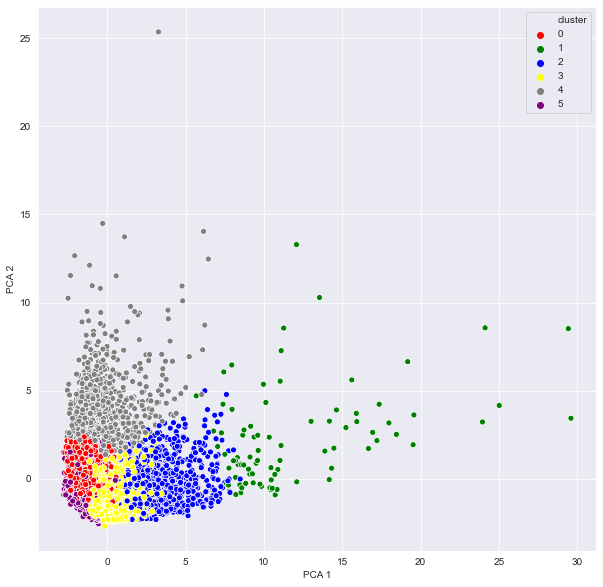

In [30]:
from sklearn.decomposition import PCA

# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(principal_comp,columns=['PCA 1','PCA 2'])

#Adding clusters to the PCA table
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

#Plotting to see clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA 1", y="PCA 2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow','gray','purple'])